## Documentation

**Purpose:** This notebook visualizes and analyzes Rent from India.

This notebook focuses on data regarding Rent prices based on Quantitative and Categorical data.Factors such as Rent price, Tenant Preferred count, Area Type, Furnishing Status and Size helped analyzed how Rent might be affected by this factors.

Sources:
https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Taking a loot at the data we have to work with.
df = pd.read_csv('Rent.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [22]:
# Rupees to USD Conversion 
# Rounded to two decimal places
df['Rent'] = df['Rent']/61.06
df['Rent'] = df['Rent'].round(2)

In [23]:
# Verifying Rupees to USD conversion is accurate
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,163.77,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,327.55,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,278.41,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,163.77,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,122.83,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [24]:
# Analyzing the Highest Rent and Lowest Rent in this data set.
print(" The lowest Rent is:",df['Rent'].min(), "and the highest rent is",df['Rent'].max() )

 The lowest Rent is: 19.65 and the highest rent is 57320.67


In [25]:
# Getting the average Rent for all Area Types.
s1 = df[df['Area Type'] == 'Super Area']['Rent'].mean()
s2 = df[df['Area Type'] == 'Carpet Area']['Rent'].mean()
s3 =df[df['Area Type'] == 'Built Area']['Rent'].mean()

In [26]:
# Created a Dictionary with the Average Rent for each Area Type
dic = {'Super Area':s1, 'Carpet Area':s2, 'Built Area':s3}

Text(0.5, 0, 'Area Types')

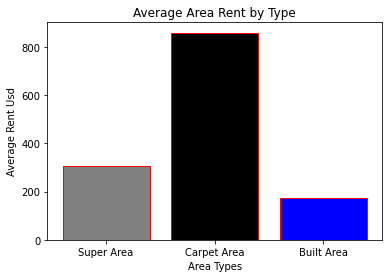

In [27]:
# Barchart of average rent for each area type.
plt.bar(dic.keys(), dic.values(), color= ('grey', 'black', 'blue'), edgecolor = 'red' )
plt.title("Average Area Rent by Type")
plt.ylabel("Average Rent Usd")
plt.xlabel("Area Types")

## Area Type ##
**Average Rent :**
The above barchart was organized based on Area Type and the average rent by area was graphed. We can see that Carpet Area had the highest Average Rent, while Built Area had the lowest Average Rent out of the three Area Types.

In [28]:
# Types of Furnished Status
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [29]:
# The Average rent of Furnished Status
x1 = df[df['Furnishing Status'] == 'Unfurnished']['Rent'].mean()
x2 = df[df['Furnishing Status'] == 'Semi-Furnished']['Rent'].mean()
x3 = df[df['Furnishing Status'] == 'Furnished']['Rent'].mean()
    

In [30]:
# Dictionary with average Rent of different Furnished Status
sd = {'Unfurnished':x1, 'Semi-Furnished': x2, 'Furnished':x3}

Text(0.5, 0, 'Furnished Status')

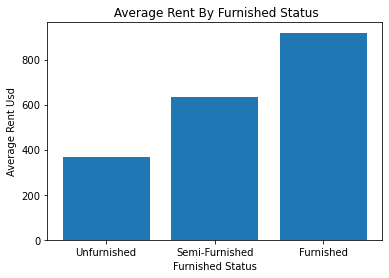

In [31]:
# barchart for furnished status types.
plt.bar(sd.keys(), sd.values())
plt.title(" Average Rent By Furnished Status")
plt.ylabel("Average Rent Usd")
plt.xlabel("Furnished Status")

## Furnished Status ##
**Average Rent :**
The above barchart shows the average rent for each type of furnished status. To get a better understanding 
of Rent prices, we decided to get the average rent price for all three types of furnihsed status and discovered that furnished apartments/rooms/houses had a higher average rent and unfurnished apartments/rooms/houses had the lowest average rent.

In [32]:
# Getting all types of Tenants preferred
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [33]:
# Getting the Preferred Tenant count for all three 
# types of Tenants preferred.
y = df['Tenant Preferred'].value_counts()
print(y)

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64


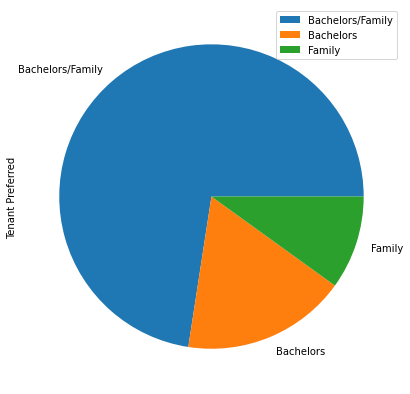

In [34]:
# Tenant Preferred Piechart.
df['Tenant Preferred'].value_counts().plot(kind='pie', y='Tenant Preferred', figsize=(7,7))
plt.legend()

## Tenant Preferred ##
**Count Comparison:**
The above piechart shows the preferred tenants(Bachelors/Family, Bachelors and Family) for the data provided.
When looking at the piechart we can tell that the preferred tenants are Bachelors/Family and the least preferred tenants are 
Family tenants.

In [35]:
# All cities in this dataset.
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [36]:
# Total listings for each city.
df['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

Text(0, 0.5, 'Rent Usd')

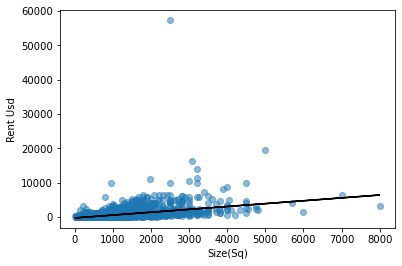

In [37]:
# Scatter plot for Size and Rent.
plt.scatter(df['Size'], df['Rent'], alpha= 0.5)
m, b = np.polyfit(df['Size'], df['Rent'], 1)
plt.plot(df['Size'], m*df['Size']+b, color = 'black')
plt.title("")
plt.xlabel("Size(Sq)")
plt.ylabel("Rent Usd")

## Rent and Size(Sq) ##
**Rent and Size Correlation:** 
To understand the correlation between the size of the (house/apartment/room) and the rent, above we plotted a scatter plot with 
all the listings up for rent with there rent price and size(Sq). By looking at the scatter plot above we can tell there is a strong positive correlation between the rent and size(sq), particularly when the size(sq) is between 1000(sq) to 3000(sq) is when the correlation is postively strong.

## Conclusion ##
This notebook shows that depending on area type and furnished status the average rent is much higher.
houses/apartments/rooms that are furnished have an average rent that is 2x higher then unfurnished houses/apartments/rooms.
Also, the area type with the highest average rent is the Carpet Area which is 2x higher then the other two areas. We can 
conclude that renting in the carpet area with it being furnished is more expensive then any other area in this dataset.